In [1]:
pip install ucimlrepo --user

Note: you may need to restart the kernel to use updated packages.


In [18]:
#Import data
import pandas as pd

Carga de datos

In [19]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
print(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
print(predict_students_dropout_and_academic_success.variables)

{'uci_id': 697, 'name': "Predict students' dropout and academic success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Other', '

In [31]:
data = pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)

Visualziacion de datos

In [21]:
data

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [22]:
data.keys()

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [ ]:
Analisis previo (descripción estadistica)

Target
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: count, dtype: float64


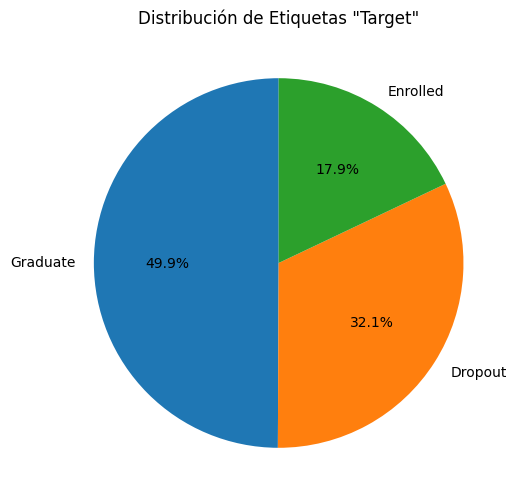

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'data'

# Calcula el conteo de etiquetas
conteo_etiquetas = data['Target'].value_counts()

# Calcula el porcentaje dividiendo por el número total de filas
porcentaje_etiquetas = (conteo_etiquetas / len(data)) * 100

# Muestra el resultado
print(porcentaje_etiquetas)

# Supongamos que tienes un DataFrame llamado 'data' con una columna 'Target'
# Calcula el conteo de cada etiqueta en la columna 'Target'

# Crea un diagrama de torta
plt.figure(figsize=(6, 6))
plt.pie(conteo_etiquetas, labels=conteo_etiquetas.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Etiquetas "Target"')

# Muestra el diagrama de torta
plt.show()

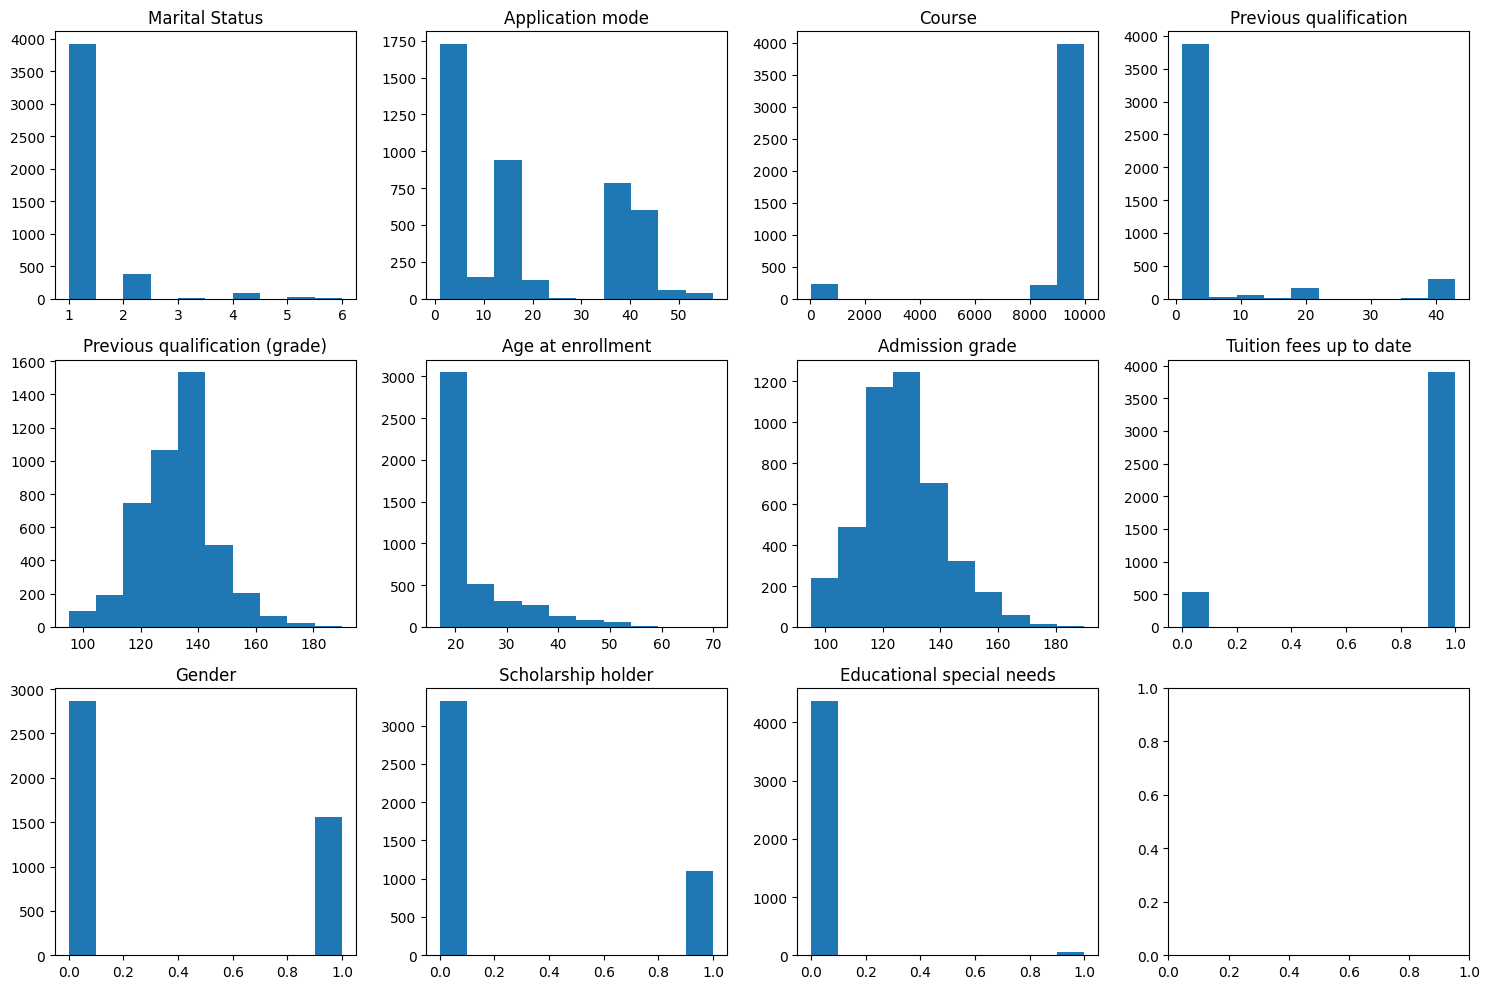

In [35]:
parametros = ['Marital Status', 'Application mode', 'Course', 'Previous qualification', 
              'Previous qualification (grade)', 'Age at enrollment', 'Admission grade', 
              'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Educational special needs']

# Configura las dimensiones del subplot (por ejemplo, 3 filas y 4 columnas)
n_filas = 3
n_columnas = 4

# Crea un subplot
fig, axs = plt.subplots(n_filas, n_columnas, figsize=(15, 10))

# Itera sobre los parámetros y crea un histograma en cada subparcela
for i, parametro in enumerate(parametros):
    fila = i // n_columnas
    columna = i % n_columnas
    axs[fila, columna].hist(data[parametro], bins=10)  # Puedes ajustar el número de contenedores según tus necesidades
    axs[fila, columna].set_title(parametro)
    
# Ajusta el diseño del subplot
plt.tight_layout()

# Muestra el subplot
plt.show()

In [23]:
columns_to_drop = [
    'Application order',
    'Daytime/evening attendance',
    'Nacionality',
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    'Displaced',
    'International',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
]

# Eliminar las columnas no deseadas
data = data.drop(columns=columns_to_drop,axis=1)

In [24]:
data

,Marital Status,Application mode,Course,Previous qualification,Previous qualification (grade),Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Target
0,1,17,171,1,122.0,127.3,0,0,1,1,0,20,Dropout
1,1,15,9254,1,160.0,142.5,0,0,0,1,0,19,Graduate
2,1,1,9070,1,122.0,124.8,0,0,0,1,0,19,Dropout
3,1,17,9773,1,122.0,119.6,0,0,1,0,0,20,Graduate
4,2,39,8014,1,100.0,141.5,0,0,1,0,0,45,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,9773,1,125.0,122.2,0,0,1,1,0,19,Graduate
4420,1,1,9773,1,120.0,119.0,0,1,0,0,0,18,Dropout
4421,1,1,9500,1,154.0,149.5,0,0,1,0,1,30,Dropout
4422,1,1,9147,1,180.0,153.8,0,0,1,0,1,20,Graduate


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split , KFold

X = data.drop(columns=['Target'])  # X contiene todas las características excepto la variable objetivo
y = data['Target'] 

X_train , X_test , y_train , y_test = train_test_split(X, y)

print("Train: ",X_train.shape , y_train.shape)
print("Test: ",X_test.shape , y_test.shape)


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Validación empleando el Out-of-Bag error vs numero de arboles
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(20, 190, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de Out-of-Bag.
for n_estimators in estimator_range:
    rf = RandomForestClassifier(
                n_estimators = n_estimators,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    oob_scores.append(rf.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del out-of-bag-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmax(oob_scores)]}")

In [ ]:
# desbalanceoo
rf = RandomForestClassifier(n_estimators=30 , class_weight="balanced" , random_state = 123)
rf.fit(X_train , y_train)
rf.score(X_test , y_test)


In [ ]:
seed=123

kfold = KFold(n_splits=5, shuffle=True , random_state=seed)
cvscores_test = []
cvscores_train = []
i=0
for train, test in kfold.split(X, y):
    i+=1
    #print(train)
    X_train_ = X.iloc[train]
    y_train_ = y.iloc[train]
    
    X_test_ = X.iloc[test]
    y_test_ = y.iloc[test]
    
    dt = RandomForestClassifier(n_estimators=30 , random_state = 123)
    dt.fit(X_train_ , y_train_)
    
    print("Accuracy folds: %d" % i)
    scores_train = dt.score(X_train_, y_train_)
    print("Train: %.2f%%" % (scores_train*100))
    cvscores_train.append(scores_train * 100)
    
    scores_test = dt.score(X_test_, y_test_)
    print("Test: %.2f%% " % (scores_test*100))
    cvscores_test.append(scores_test * 100)
    
print("Mean train accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_train), np.std(cvscores_train)))
print("Mean test accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_test), np.std(cvscores_test)))

In [ ]:
from sklearn.model_selection import StratifiedKFold
seed=123

kfold = StratifiedKFold(n_splits=5, shuffle=True , random_state=seed)
cvscores_test = []
cvscores_train = []
i=0
for train, test in kfold.split(X, y):
    i+=1
    #print(train)
    X_train_ = X.iloc[train]
    y_train_ = y.iloc[train]
    
    X_test_ = X.iloc[test]
    y_test_ = y.iloc[test]
    
    dt = RandomForestClassifier(n_estimators=30 , class_weight="balanced" , random_state = 123)
    dt.fit(X_train_ , y_train_)
    
    print("Accuracy folds: %d" % i)
    scores_train = dt.score(X_train_, y_train_)
    print("Train: %.2f%%" % (scores_train*100))
    cvscores_train.append(scores_train * 100)
    
    scores_test = dt.score(X_test_, y_test_)
    print("Test: %.2f%% " % (scores_test*100))
    cvscores_test.append(scores_test * 100)
    
print("Mean train accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_train), np.std(cvscores_train)))
print("Mean test accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores_test), np.std(cvscores_test)))